# **NETFLIX BEHAVIOUR ANALYSIS**

# **DATA LOADING AND DATA CLEANING**

In [1]:
from google.colab import files
uploaded = files.upload() #we do this process to add the file to the code

Saving netflix_user_data.csv to netflix_user_data.csv


In [2]:
import pandas as pd
df = pd.read_csv('/content/netflix_user_data.csv') # we use pandas to work with data
print(df.head())
print(df.info()) #we use this to get the proper knowledge of data like rows columns and etc
print(df.describe())

             Title   Genre  Release_Year Date_Viewed  Country  \
0     Breaking Bad   Drama          2008  2023-01-01       UK   
1  Stranger Things  Sci-Fi          2016  2023-01-02      USA   
2      Money Heist   Crime          2017  2023-01-03    India   
3        The Crown   Drama          2016  2023-01-04   Canada   
4           Narcos   Crime          2015  2023-01-05  Germany   

   Duration_Minutes User_Type  Device  
0                47      Teen  Mobile  
1                51     Adult      TV  
2                45     Adult  Laptop  
3                58      Teen  Tablet  
4                50     Adult      TV  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             100 non-null    object
 1   Genre             100 non-null    object
 2   Release_Year      100 non-null    int64 
 3   Date_Viewed       100 non-null 

In [3]:
#now we got the basic info of data now we will clean the data before that we will covert date viwed to date time
df['Date_Viewed'] = pd.to_datetime(df['Date_Viewed'])
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

# **VISUALIZATION**

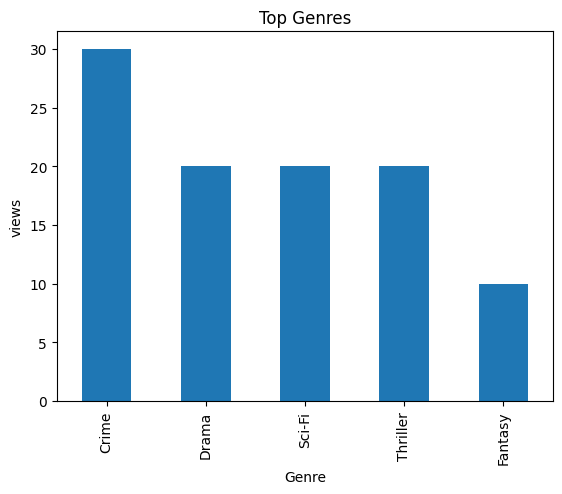

In [5]:
import matplotlib.pyplot as plt #used in visulization
genre_counts = df['Genre'].value_counts() #this will help give counts of genres
genre_counts.plot(kind="bar", title='Top Genres')
plt.ylabel('views')
plt.show()

WE USE BAR CHART TO SHOW MOST NUMBER OF USERS AT SPECIFIC GENRES
From above greph we can clearly see Crime category is mosed viewd and fantasy is least viewd.

<Axes: title={'center': 'Monthly Trends'}, xlabel='Month'>

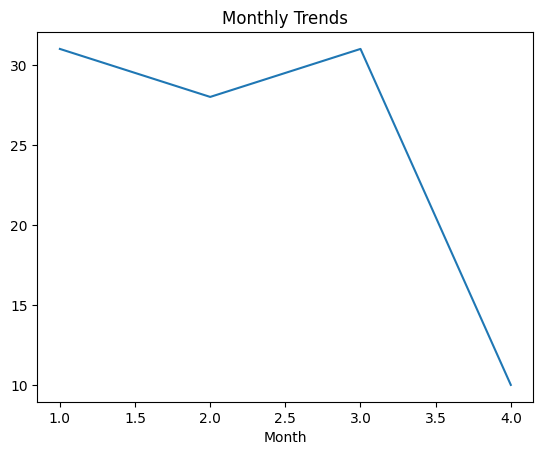

In [6]:
#we will use line chart to find monthly trends
df['Month'] = df['Date_Viewed'].dt.month
monthly_views = df.groupby('Month').size()
monthly_views.plot(kind='line', title='Monthly Trends')

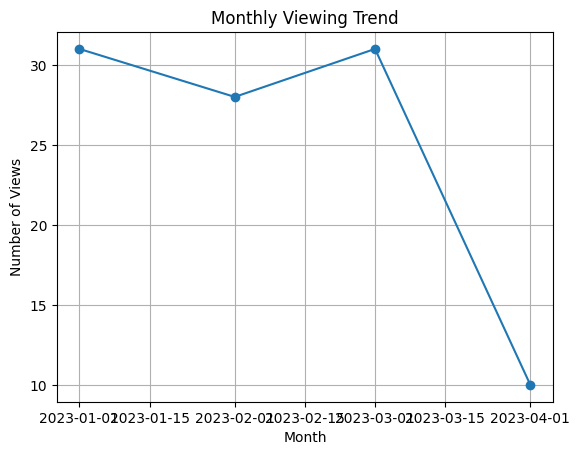

In [7]:
df["Month"] = df["Date_Viewed"].dt.to_period("M")
monthly_views = df.groupby("Month").size().reset_index(name="Views")
monthly_views["Month"] = monthly_views["Month"].dt.to_timestamp()

plt.plot(monthly_views["Month"], monthly_views["Views"], marker='o')
plt.title("Monthly Viewing Trend")
plt.xlabel("Month")
plt.ylabel("Number of Views")
plt.grid(True)
plt.show()


WE CAN SEE DURING 1ST MONTH AND 3RD MONTH GOT THE HIGHEST VIEWS

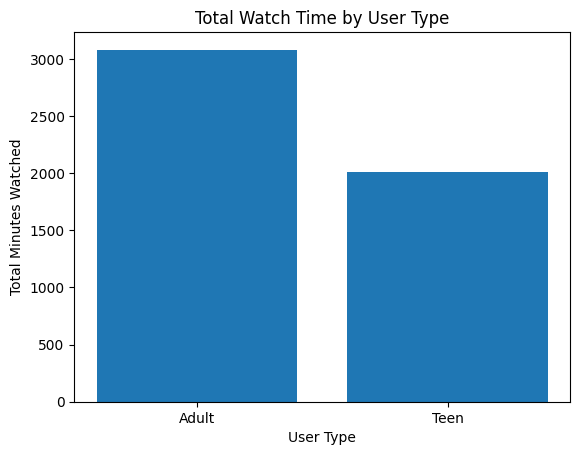

In [8]:
#NOW TO COMPARE TEEN VS ADULT WE WILL AGAIN USE BAR CHART
watch_by_user = df.groupby("User_Type")["Duration_Minutes"].sum().reset_index()

plt.bar(watch_by_user["User_Type"], watch_by_user["Duration_Minutes"])
plt.title("Total Watch Time by User Type")
plt.xlabel("User Type")
plt.ylabel("Total Minutes Watched")
plt.show()
